In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import functools as ft
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re



In [2]:


r = requests.get("https://logicalharmony.net/cruelty-free-brands-at-ulta/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='entry-content')
for brand in brand_section1.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(brands)


181

In [3]:
print(brands)

['About Face – 100% vegan', 'Ace Beauté', 'ACURE – 100% vegan', 'AG Care – 100% vegan', 'Anastasia Beverly Hills', 'Andalou Naturals', 'Aquis', 'Arctic Fox – 100% vegan', 'Ardell', 'Ariana Grande', 'Axiology – 100% vegan', 'Babo Botanicals', 'bare Minerals\xa0(list of bare Minerals vegan products) – Parent company is not cruelty-free.', 'Beast', 'Beauty Bakerie', 'beautyblender', 'BH Cosmetics', 'Bio Ionic', 'Bliss', 'Body Shop, The', 'Boscia', 'Briogeo – Parent company is not cruelty-free.', 'Burt’s Bees\xa0–\xa0Parent company is not cruelty-free.', 'Buxom\xa0–\xa0Parent company is not cruelty-free.', 'Cocokind', 'ColourPop', 'Conair', 'COOLA\xa0(list of COOLA vegan products)', 'CoverFX – 100% vegan', 'COVERGIRL\xa0– Parent company is not cruelty-free.\xa0', 'DefineMe Fragrance – 100% vegan', 'Derma E – 100% vegan', 'Dermablend –\xa0Parent company is not cruelty-free.\xa0', 'Dermalogica\xa0–\xa0Parent company is not cruelty-free.\xa0', 'DevaCurl – Parent company is not cruelty-free.\x

In [4]:
# create dataframe - start with just brands list, then adjust
cruelty_free_ulta_df = pd.DataFrame({'Brand_info': brands})   
cruelty_free_ulta_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_ulta.csv', index=False)
cruelty_free_ulta_df.head()

,Brand_info
0,About Face – 100% vegan
1,Ace Beauté
2,ACURE – 100% vegan
3,AG Care – 100% vegan
4,Anastasia Beverly Hills


In [5]:
# create a new column that tells whether or not a product is vegan
# create dataframe - start with just brands list, then adjust
cruelty_free_ulta_df['All_vegan'] = cruelty_free_ulta_df['Brand_info'].str.contains('100% vegan')
cruelty_free_ulta_df['Partial_vegan'] = cruelty_free_ulta_df['Brand_info'].str.contains('vegan product', case=False)

In [6]:
print(cruelty_free_ulta_df.All_vegan.sum())
print(cruelty_free_ulta_df.Partial_vegan.sum())
cruelty_free_ulta_df.head()

40
10


,Brand_info,All_vegan,Partial_vegan
0,About Face – 100% vegan,True,False
1,Ace Beauté,False,False
2,ACURE – 100% vegan,True,False
3,AG Care – 100% vegan,True,False
4,Anastasia Beverly Hills,False,False


In [7]:
cruelty_free_ulta_df['Brand_info'].str.contains('Parent company').sum()


29

In [8]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
cruelty_free_ulta_df['Bad_parent_company'] = cruelty_free_ulta_df['Brand_info'].str.contains('Parent company', case=False)

In [9]:
cruelty_free_only = cruelty_free_ulta_df[(cruelty_free_ulta_df['All_vegan'] == False) & (cruelty_free_ulta_df['Partial_vegan'] == False) & (cruelty_free_ulta_df['Bad_parent_company'] == False)]
num_cruelty_free = len(cruelty_free_only)
print(f"Number of brands that are just cruelty-free: {num_cruelty_free}")

Number of brands that are just cruelty-free: 109


In [10]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
cruelty_free_ulta_df['Bad_parent_company'] = cruelty_free_ulta_df['Brand_info'].str.contains('Parent company', case=False)

In [11]:
cruelty_free_ulta_df.head(20)

,Brand_info,All_vegan,Partial_vegan,Bad_parent_company
0,About Face – 100% vegan,True,False,False
1,Ace Beauté,False,False,False
2,ACURE – 100% vegan,True,False,False
3,AG Care – 100% vegan,True,False,False
4,Anastasia Beverly Hills,False,False,False
5,Andalou Naturals,False,False,False
6,Aquis,False,False,False
7,Arctic Fox – 100% vegan,True,False,False
8,Ardell,False,False,False
9,Ariana Grande,False,False,False


In [12]:
cruelty_free_ulta_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_ulta.csv', index=False)

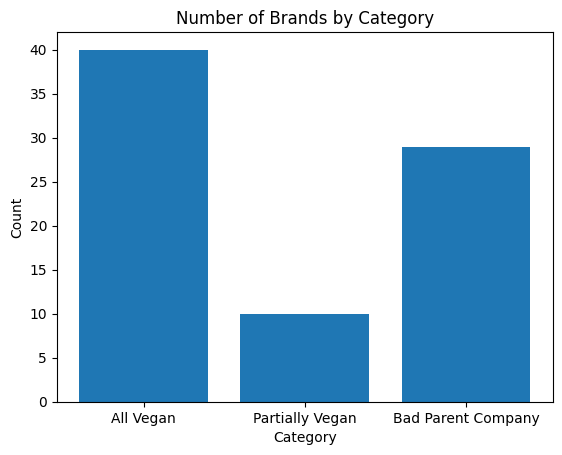

In [13]:
# count the number of brands in each category
all_vegan_count = cruelty_free_ulta_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_ulta_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_ulta_df['Bad_parent_company'].sum()

# create a bar plot of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count]
plt.bar(labels, counts)
plt.title('Number of Brands by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

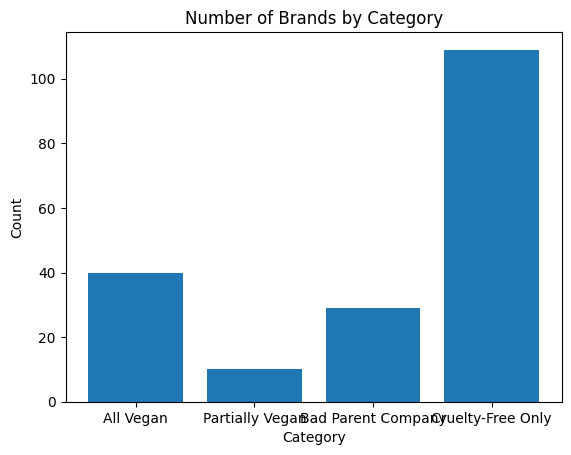

In [14]:
# count the number of brands in each category
all_vegan_count = cruelty_free_ulta_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_ulta_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_ulta_df['Bad_parent_company'].sum()
cruelty_free_count = len(cruelty_free_only)

# create a bar plot of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company', 'Cruelty-Free Only']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count, cruelty_free_count]
plt.bar(labels, counts)
plt.title('Number of Brands by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

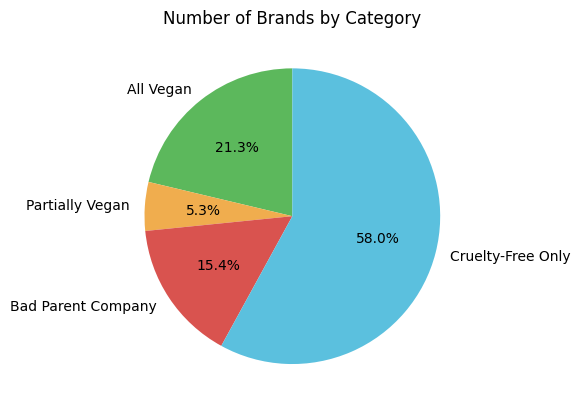

In [15]:
# count the number of brands in each category
all_vegan_count = cruelty_free_ulta_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_ulta_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_ulta_df['Bad_parent_company'].sum()
cruelty_free_count = len(cruelty_free_only)

# create a pie chart of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company', 'Cruelty-Free Only']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count, cruelty_free_count]
colors = ['#5cb85c', '#f0ad4e', '#d9534f', '#5bc0de']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Number of Brands by Category')
plt.show()


In [16]:

r = requests.get("https://www.ulta.com/brand/all#A/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='ShopAllBrands__brandList')
for brand in brand_section1.find_all('ul'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(brands)


81

In [17]:
print(brands)

['about-face', 'Ace BeautÃ©', 'ACURE', 'B.Bungalow by Beachwaver Co.', 'b.tan', 'Babo Botanicals', 'Caboodles', 'Calvin Klein', 'Camille Rose', 'Da Bomb', 'Daily Concepts', 'Dashing Diva', 'e.l.f. Cosmetics', 'Each & Every', 'Earth Harbor', 'Fairy Tales', 'Fake Bake', 'FEKKAI', 'Ga.Ma Italy Professional', 'Garnier', 'Ghd', 'HAIRtamin', 'HALLY', 'HAN Skincare Cosmetics', 'I Dew Care', 'ICONIC LONDON', 'iDesign', 'J.Cat Beauty', 'J.R. Watkins', 'Jack Black', 'kaia naturals', 'Kate Somerville', 'Kate Spade New York', 'L.A. Girl', "L'ange", "L'anza", 'MAC', 'Mad Hippie', 'Made By Dentists', 'NABLA', 'Nads Natural', 'Nail Tek', 'Odele', 'Ofra Cosmetics', 'OGX', 'Pacifica', 'Paco Rabanne', 'Parissa', 'Qhemet Biologics', '', '', 'r.e.m. beauty', 'Ralph Lauren', 'Rapidlash', 'SABON', 'Sacheu', 'Sally Hansen', 'T3', 'TAN-LUXE', 'Tangle Teezer', 'ULTA Beauty Collection', 'Unbound', 'Undefined Beauty', 'Vacation', 'Valentino', 'VDL', 'Wahl', 'Wakse', 'We Are Paradoxx', 'XX Revolution', '', '', 'Y

In [18]:
# make a GET request to the ULTA website
r = requests.get("https://www.ulta.com/brand/all#A/")

# create a BeautifulSoup object from the HTML content
soup = BeautifulSoup(r.content, 'html.parser')

# find the div that contains all the brands
brand_section = soup.find('div', {'class': 'ShopAllBrands__brandList'})

# create an empty list that will store the brands
brands = []

# iterate over each <a> tag within the div
for brand in brand_section.find_all('a'):
    # extract the text of the <a> tag and append it to the brands list
    brand_name = brand.get_text().strip()
    if brand_name:
        brands.append(brand_name)

# remove duplicates from the list
brands = list(set(brands))

# print the number of brands and the first 10 brands in the list
print(f"Number of brands: {len(brands)}")
print(brands[:10])

Number of brands: 73
['T3', 'Jack Black', 'Pacifica', 'Caboodles', 'Qhemet Biologics', 'NABLA', 'Parissa', 'e.l.f. Cosmetics', 'Ghd', 'Yves Saint Laurent']


In [19]:
brands = []

for page_num in range(1, 24): # there are 23 pages of brands
    url = f"https://www.ulta.com/brand/all?N=1z141ht&No={page_num*96-96}&Nrpp=96"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    brand_section = soup.find(class_='ShopAllBrands__brandList')
    for brand in brand_section.find_all('ul'):
        brand_name = brand.text.strip()
        if brand_name:
            brands.append(brand_name)

print(len(brands))
print(brands)

1679
['about-face', 'Ace BeautÃ©', 'ACURE', 'B.Bungalow by Beachwaver Co.', 'b.tan', 'Babo Botanicals', 'Caboodles', 'Calvin Klein', 'Camille Rose', 'Da Bomb', 'Daily Concepts', 'Dashing Diva', 'e.l.f. Cosmetics', 'Each & Every', 'Earth Harbor', 'Fairy Tales', 'Fake Bake', 'FEKKAI', 'Ga.Ma Italy Professional', 'Garnier', 'Ghd', 'HAIRtamin', 'HALLY', 'HAN Skincare Cosmetics', 'I Dew Care', 'ICONIC LONDON', 'iDesign', 'J.Cat Beauty', 'J.R. Watkins', 'Jack Black', 'kaia naturals', 'Kate Somerville', 'Kate Spade New York', 'L.A. Girl', "L'ange", "L'anza", 'MAC', 'Mad Hippie', 'Made By Dentists', 'NABLA', 'Nads Natural', 'Nail Tek', 'Odele', 'Ofra Cosmetics', 'OGX', 'Pacifica', 'Paco Rabanne', 'Parissa', 'Qhemet Biologics', 'r.e.m. beauty', 'Ralph Lauren', 'Rapidlash', 'SABON', 'Sacheu', 'Sally Hansen', 'T3', 'TAN-LUXE', 'Tangle Teezer', 'ULTA Beauty Collection', 'Unbound', 'Undefined Beauty', 'Vacation', 'Valentino', 'VDL', 'Wahl', 'Wakse', 'We Are Paradoxx', 'XX Revolution', 'Youthforia',

In [20]:
# create dataframe - start with just brands list, then adjust
all_brands_ulta_df = pd.DataFrame({'Brand_info': brands})   
all_brands_ulta_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_ulta_.csv', index=False)
all_brands_ulta_df.head()

,Brand_info
0,about-face
1,Ace BeautÃ©
2,ACURE
3,B.Bungalow by Beachwaver Co.
4,b.tan


In [21]:
# # create dataframe - start with just brands list, then adjust
# not_cruelty_free_ulta_df = pd.DataFrame({'Brand_info': brands})   
# not_cruelty_free_ulta_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/not_cruelty_free_ulta_.csv', index=False)
# not_cruelty_free_ulta_df.head()

In [22]:
# create list of boolean values indicating cruelty-free status
cruelty_free = []
for brand in not_cruelty_free_ulta_df['Brand_info']:
    if 'cruelty free' in brand.lower():
        cruelty_free.append(True)
    else:
        cruelty_free.append(False)

# add cruelty_free column to DataFrame
not_cruelty_free_ulta_df['cruelty_free'] = cruelty_free

# display DataFrame
print(not_cruelty_free_ulta_df.head())


NameError: name 'not_cruelty_free_ulta_df' is not defined

In [ ]:
# load dataframes from CSV files
# cruelty_free_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/ulta.csv')
# not_cruelty_free_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/not_cruelty_free_ulta.csv')

# # create list of boolean values indicating cruelty-free status
# cruelty_free = []
# for brand in not_cruelty_free_ulta_df['Brand_info']:
#     if 'cruelty free' in brand.lower():
#         cruelty_free.append(True)
#     else:
#         cruelty_free.append(False)

# # add cruelty_free column to not_cruelty_free_ulta_df
# not_cruelty_free_ulta_df['cruelty_free'] = cruelty_free

# # create list of boolean values indicating whether brand is in not_cruelty_free_ulta_df
# in_not_cruelty_free_ulta = []
# for brand in cruelty_free_ulta_df['Brand_info']:
#     if brand in not_cruelty_free_ulta_df['Brand_info'].tolist():
#         in_not_cruelty_free_ulta.append(True)
#     else:
#         in_not_cruelty_free_ulta.append(False)

# # add in_not_cruelty_free_ulta column to all_brands_df
# cruelty_free_ulta_df['in_not_cruelty_free_ulta'] = in_not_cruelty_free_ulta

# # create pie chart of cruelty-free status for all brands
# labels = ['Cruelty-Free', 'Not Cruelty-Free']
# sizes = [df['in_not_cruelty_free_ulta'].value_counts()[True], df['in_not_cruelty_free_ulta'].value_counts()[False]]
# colors = ['lightgreen', 'pink']
# explode = (0.1, 0)

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# ax1.axis('equal')
# plt.title('Cruelty-Free Status of All Brands at Ulta')
# plt.show()

In [ ]:
# load data from CSV files
all_brands_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_ulta.csv')
cruelty_free_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_ulta.csv')

# check if brand names appear in both data frames
all_brands_ulta_df['cruelty_free'] = all_brands_ulta_df['Brand_info'].isin(cruelty_free_ulta_df['Brand_info'])

# display table
print(all_brands_ulta_df.head(40))

In [ ]:

df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_comparison.csv', index=False)

In [ ]:
# Count the number of cruelty-free and non-cruelty-free brands
num_cruelty_free = len(cruelty_free_ulta_df)
num_non_cruelty_free = len(all_brands_ulta_df) - num_cruelty_free

# Create a list of values and labels for the pie chart
values = [num_cruelty_free, num_non_cruelty_free]
labels = ['Cruelty-free', 'Non-cruelty-free']

# Set the color for each section of the pie chart
colors = ['green', 'red']

# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage of Cruelty-free Brands')

# Show the pie chart
plt.show()

In [ ]:
plt.savefig('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/pie_chart.png')

In [ ]:
# Create the pie chart with additional arguments
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.05, 0), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a title to the pie chart
plt.title('Percentage of Cruelty-free Brands verified by Logic Harmony in Ulta')

# Show the pie chart
plt.show()

In [ ]:
# Load data from CSV files
all_peta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_peta.csv')
all_brands_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_ulta.csv')

# Convert brand names to lowercase for case-insensitive comparison
all_peta_df['Brand_info'] = all_peta_df['Brand_info'].str.lower()
all_brands_ulta_df['Brand_info'] = all_brands_ulta_df['Brand_info'].str.lower()

# Check if brand names appear in both data frames
all_peta_df['cruelty_free'] = all_peta_df['Brand_info'].isin(all_brands_ulta_df['Brand_info'])

# Calculate the number of cruelty-free brands out of all brands
num_cruelty_free_brands = all_peta_df['cruelty_free'].sum()

# Calculate the percentage of cruelty-free brands out of all brands
percentage_cruelty_free = (num_cruelty_free_brands / len(all_brands_ulta_df)) * 100

# Calculate the percentage of non-cruelty-free brands out of all brands
percentage_non_cruelty_free = 100 - percentage_cruelty_free

# Print the results
print(f"Number of cruelty-free brands out of all brands: {num_cruelty_free_brands}")
print(f"Percentage of cruelty-free brands out of all brands: {percentage_cruelty_free:.2f}%")
print(f"Percentage of non-cruelty-free brands out of all brands: {percentage_non_cruelty_free:.2f}%")

In [ ]:
import pandas as pd

# Load data from CSV files
all_peta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_peta.csv')
all_brands_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_ulta.csv')

# Convert brand names to lowercase for case-insensitive comparison
all_peta_df['Brand_info'] = all_peta_df['Brand_info'].str.lower()
all_brands_ulta_df['Brand_info'] = all_brands_ulta_df['Brand_info'].str.lower()

# Check if brand names appear in both data frames
all_peta_df['cruelty_free'] = all_peta_df['Brand_info'].isin(all_brands_ulta_df['Brand_info'])

# Calculate the number of cruelty-free brands out of all brands
num_cruelty_free_brands = all_peta_df['cruelty_free'].sum()

# Calculate the percentage of cruelty-free brands out of all brands
percentage_cruelty_free = (num_cruelty_free_brands / len(all_brands_ulta_df)) * 100

# Calculate the percentage of non-cruelty-free brands out of all brands
percentage_non_cruelty_free = 100 - percentage_cruelty_free

# Print the results
print(f"Number of cruelty-free brands out of all brands: {num_cruelty_free_brands}")
print(f"Percentage of cruelty-free brands out of all brands: {percentage_cruelty_free:.2f}%")
print(f"Percentage of non-cruelty-free brands out of all brands: {percentage_non_cruelty_free:.2f}%")

# Print unique brand names from both DataFrames
print("Unique brand names in all_peta_df:")
print(all_peta_df['Brand_info'].unique())

print("Unique brand names in all_brands_ulta_df:")
print(all_brands_ulta_df['Brand_info'].unique())


In [ ]:
# create list of boolean values indicating cruelty-free status
cruelty_free = []
for brand in not_cruelty_free_ulta_df['Brand_info']:
    if 'cruelty free' in brand.lower():
        cruelty_free.append(True)
    else:
        cruelty_free.append(False)

# add cruelty_free column to DataFrame
not_cruelty_free_ulta_df['cruelty_free'] = cruelty_free

# display DataFrame
print(not_cruelty_free_ulta_df.head())

In [ ]:
# Load data from CSV files
all_peta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_peta.csv')
all_brands_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/all_brands_ulta.csv')

# Convert brand names to lowercase for case-insensitive comparison
all_peta_df['Brand_info'] = all_peta_df['Brand_info'].str.lower()
all_brands_ulta_df['Brand_info'] = all_brands_ulta_df['Brand_info'].str.lower()

# Add a column to store the result of cruelty-free check
all_brands_ulta_df['cruelty_free'] = all_brands_ulta_df['Brand_info'].isin(all_peta_df['Brand_info'])

# Print the updated DataFrame
print(all_brands_ulta_df)

In [ ]:



# Print the number of cruelty-free products and their percentages
print(f"Number of cruelty-free products: {num_cruelty_free}")
print(f"Percentage of cruelty-free products: {percentage_cruelty_free:.2f}%")
print(f"Percentage of non-cruelty-free products: {percentage_non_cruelty_free:.2f}%")

In [ ]:
plt.title('Cruelty-Free Status of Brands Stocked by Ulta')

# Count the number of true and false values in the 'cruelty_free' column
cruelty_free_counts = all_brands_ulta_df['cruelty_free'].value_counts()

# Create labels for the pie chart
labels = ['Cruelty-Free', 'Not Cruelty-Free']

# Create colors for the pie chart
colors = ['green', 'red']

# Create the pie chart
plt.pie(cruelty_free_counts, labels=labels, colors=colors, autopct='%1.1f%%')


# Display the chart
plt.show()

# Add a title

# Count the number of true and false values in the 'cruelty_free' column
cruelty_free_counts = all_brands_ulta_df['cruelty_free'].value_counts()

# Calculate the total number of products
total_products = len(all_brands_ulta_df)

# Calculate the percentage of cruelty-free products
percentage_cruelty_free = (cruelty_free_counts[True] / total_products) * 100

# Calculate the percentage of non-cruelty-free products
percentage_non_cruelty_free = (cruelty_free_counts[False] / total_products) * 100

# Print the results
print(f"Number of cruelty-free products: {cruelty_free_counts[True]}")
print(f"Percentage of cruelty-free products: {percentage_cruelty_free:.2f}%")
print(f"Number of non-cruelty-free products: {cruelty_free_counts[False]}")
print(f"Percentage of non-cruelty-free products: {percentage_non_cruelty_free:.2f}%")


In [ ]:
import matplotlib.pyplot as plt

# Count the number of true and false values in the 'cruelty_free' column
cruelty_free_counts = all_brands_ulta_df['cruelty_free'].value_counts()

# Create labels for the pie chart
labels = ['Cruelty-Free', 'Not Cruelty-Free']

# Create colors for the pie chart
colors = ['#66BB6A', '#FF7043']

# Create explode values to emphasize the 'Cruelty-Free' slice
explode = (0.1, 0)

# Create the pie chart
plt.pie(cruelty_free_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

# Add a title
plt.title('Cruelty-Free Status of by Ulta verified by PETA')

# Add a legend
plt.legend()

# Display the chart
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the number of true and false values in the 'cruelty_free' column
cruelty_free_counts = all_brands_ulta_df['cruelty_free'].value_counts()

# Create labels for the bar graph
labels = ['Cruelty-Free', 'Not Cruelty-Free']

# Create colors for the bar graph
colors = ['#66BB6A', '#FF7043']

# Create the bar graph
plt.bar(labels, cruelty_free_counts, color=colors)

# Add data labels on top of each bar
for i, count in enumerate(cruelty_free_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add a title
plt.title('Cruelty-Free Status of Products in Ulta Verified by PETA')

# Display the chart
plt.show()
